In [1]:
from IPython.display import HTML
HTML('''<style>html, body{overflow-y: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides
!pip install git+https://github.com/renatopp/liac-arff@master
!pip install git+https://github.com/openml/openml-python.git@develop
!pip install mglearn
from IPython.display import set_matplotlib_formats, display, HTML
from IPython.core.interactiveshell import InteractiveShell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openml as oml
import mglearn
import os
from cycler import cycler
from pprint import pprint

set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
#plt.rcParams['lines.linewidth'] = 1
plt.rcParams['legend.numpoints'] = 1
plt.rc('axes', prop_cycle=(cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
                           cycler('linestyle', ['-', '--', ':',
                                                '-.', '--'])
                           )
       )

np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('precision', 2)

np, mglearn

# Prints outputs in cells so that we don't have to write print() every time 
#InteractiveShell.ast_node_interactivity = "all"

# Matplotlib tweaks for presentations
plt.rcParams["figure.figsize"] = (5, 3)
plt.rcParams["figure.max_open_warning"] = -1
plt.rcParams['font.size'] = 8; 
plt.rcParams['lines.linewidth'] = 0.5


# Presentations
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {'width': '95%', 'height': 786, 'scroll': True, 'theme': 'solarized', 'transition': 'fade', 'overflow': 'visible', 'start_slideshow_at': 'selected'})

# Silence warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)

import numpy as np

  Cloning https://github.com/renatopp/liac-arff (to master) to /tmp/pip-u9od4tp6-build
  Running setup.py install for liac-arff ... - done
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
  Cloning https://github.com/openml/openml-python.git (to develop) to /tmp/pip-hkyfpc5e-build
    100% |████████████████████████████████| 61kB 3.0MB/s 
    100% |████████████████████████████████| 163kB 4.1MB/s 
    100% |████████████████████████████████| 40kB 7.8MB/s 
    100% |████████████████████████████████| 102kB 6.0MB/s 
    100% |████████████████████████████████| 51kB 8.0MB/s 
    100% |████████████████████████████████| 112kB 5.6MB/s 
    100% |████████████████████████████████| 102kB 7.2MB/s 
    19% |██████▍                         | 1.4MB 18.6MB/s eta 0:00:01

    100% |████████████████████████████████| 6.8MB 192kB/s 
    100% |████████████████████████████████| 1.6MB 719kB/s 
    100% |████████████████████████████████| 256kB 4.8MB/s 
  Running setup.py bdist_wheel for PyYAML ... - \ done
  Stored in directory: /content/.cache/pip/wheels/03/05/65/bdc14f2c6e09e82ae3e0f13d021e1b6b2481437ea2f207df3f
  Running setup.py bdist_wheel for netifaces ... - \ | / - done
  Stored in directory: /content/.cache/pip/wheels/a9/dc/b4/ed4577d960811e37fde4718b2b615da8e3352bd54c23731622
  Running setup.py bdist_wheel for wrapt ... - \ done
  Stored in directory: /content/.cache/pip/wheels/48/5d/04/22361a593e70d23b1f7746d932802efe1f0e523376a74f321e
Successfully built PyYAML netifaces wrapt
  Found existing installation: PyYAML 3.11
    Uninstalling PyYAML-3.11:
      Successfully uninstalled PyYAML-3.11
  Running setup.py install for openml ... - \ done
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider

    100% |████████████████████████████████| 542kB 1.8MB/s 
  Running setup.py bdist_wheel for mglearn ... - \ | done
  Stored in directory: /content/.cache/pip/wheels/3b/81/34/a54d61d5d108dfcb016bcd8f4f7d8cc0538994f07704714b8d
Successfully built mglearn
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Foundations of Data Mining: Fashion-MNIST Challenge

Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

In [0]:
# %matplotlib inline
# from preamble import *
# plt.rcParams['figure.dpi'] = 200 # This controls the size of your figures
# plt.rcParams['savefig.dpi'] = 200 # This controls the size of your figures
# # Comment out and restart notebook if you only want the last output of each cell.
# InteractiveShell.ast_node_interactivity = "all" 

import sklearn.decomposition as deco
from sklearn.cluster import KMeans 
from sklearn.metrics import confusion_matrix

In [0]:
# Please fill in your names here
NAME_STUDENT_1 = "Jan-Niklas Schneider 1260421"
NAME_STUDENT_2 = ""

## Fashion-MNIST
The [Fashion-MNIST dataset](https://www.openml.org/d/40996) contains 70,000 images of Zalando fashion products, classified into 10 types of clothing, each represented by 28 by 28 pixel values. We can easily download it from OpenML and visualize one of the examples:

In [0]:
fmnist_classes = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 
                  6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

In [0]:
fmnist_data = oml.datasets.get_dataset(40996) # Download MNIST data
# Get the predictors X and the labels y
X, y = fmnist_data.get_data(target=fmnist_data.default_target_attribute);

In [0]:
# build a list of figures for plotting
def buildFigureList(fig, subfiglist, titles, length):
    
    for i in range(0,length):
        pixels = np.array(subfiglist[i], dtype='float')
        pixels = pixels.reshape((28, 28))
        a=fig.add_subplot(1,length,i+1)
        imgplot =plt.imshow(pixels, cmap='gray_r')
        a.set_title(titles[i], fontsize=6)
        a.axes.get_xaxis().set_visible(False)
        a.axes.get_yaxis().set_visible(False)
    return


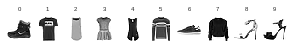

In [104]:
subfiglist = []
titles=[]

for i in range(0,10):
    subfiglist.append(X[i])
    titles.append(i)

buildFigureList(plt.figure(1),subfiglist, titles, 10)
plt.show()

### a)  Analyze the main components of a class (6 points)

Write a piece of code that takes a set of 28x28 images as input and does the following:

- Compute and show the mean and the first two principle components as 
images
- Make a 2-dimensional scatter plot of the transformed data 
- Compute and show a small number of samples along each of the two main axes as images (as in the lecture)
- Compute and show a sample of input images along each of the two main axes as images (as in the lecture)

Apply your code to the class 0 (T-shirt/top) of Fashion MNIST. Answer the following questions:

- What aspect(s) of the data does the first component capture? 
- What aspect(s) of the data does the second component capture? 


In [0]:
# methods for plotting data
name = 'binary'


def plot_as_in_lecture(fig, subfiglist):
    for i in range(0,25):
        pixels = np.array(subfiglist[i], dtype='float')
        pixels = pixels.reshape((28, 28))
        a=fig.add_subplot(5,5,i+1)
        imgplot =plt.imshow(pixels, cmap=name)
        a.axes.get_xaxis().set_visible(False)
        a.axes.get_yaxis().set_visible(False)
    return
  
def plot_comp_mean(pca):
  fig = plt.figure(1, figsize=(15,10))
  for i in range(3): 
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    if (i == 2):
      ax.set_xlabel('mean')
      ax.imshow(np.reshape(pca.mean_, (28,28)), cmap=plt.get_cmap(name));
    else:
      ax.set_xlabel('component {}'.format(i))
      ax.imshow(np.reshape(pca.components_[i], (28,28)), cmap=plt.get_cmap(name));
  plt.show;
  
def plot_scatter_pca(X_pca):
  fig = plt.figure(1, figsize=(15,10));
  plt.scatter(X_pca[:,0],X_pca[:,1], marker='o', c=y,alpha=0.7);
  plt.show;
  
def compute_new_data(X_pca, pca):
  mean, std = np.mean(X_pca, axis=0), np.std(X_pca, axis=0)
  min_, max_ = mean - 1.5*std, mean + 1.5*std

  X_temp = np.arange(min_[0], max_[0]+1, (max_[0] - min_[0])/4)
  Y_temp = np.arange(min_[1], max_[1]+1, (max_[1] - min_[1])/4)
  X_new = np.array([[x, y] for x in X_temp for y in Y_temp])
  X_new = pca.inverse_transform(X_new)
  return X_new

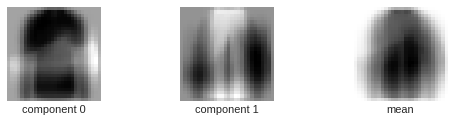

In [106]:
# compute and show mean and the first two principle components as images

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plot_comp_mean(pca)

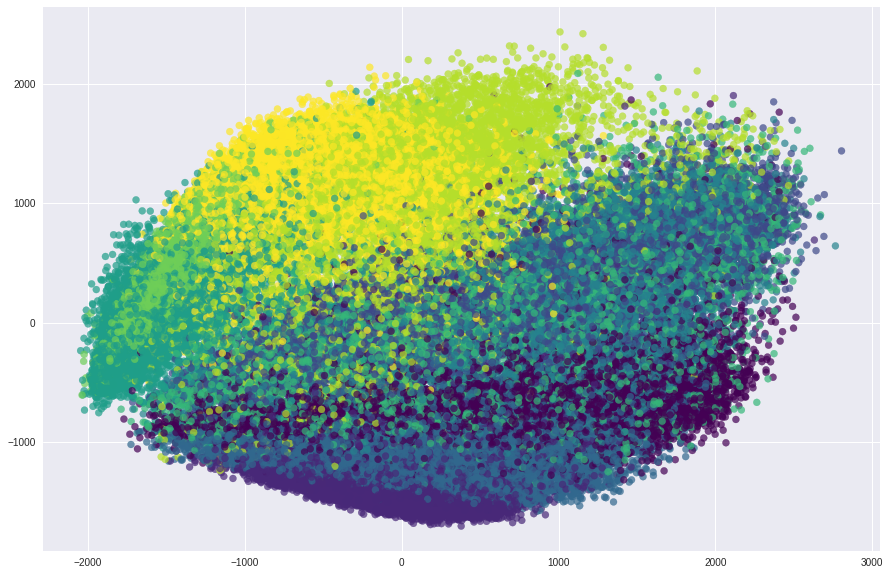

In [107]:
# Make a 2-dimensional scatter plot of the transformed data

plot_scatter_pca(X_pca)

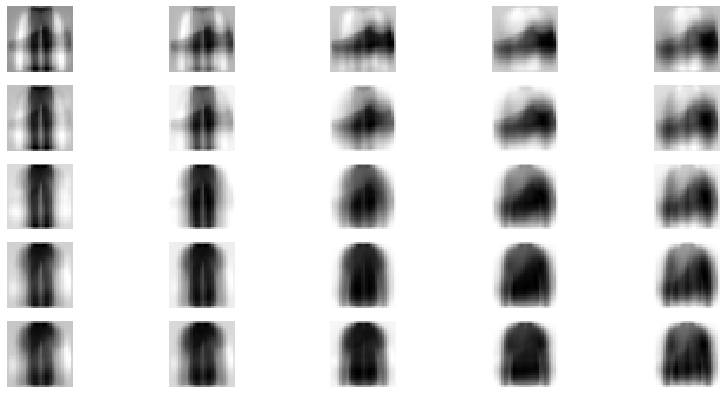

In [108]:
# Compute and show a small number of samples along each of the two main axes as images (as in the lecture)

X_new = compute_new_data(X_pca, pca)
plot_as_in_lecture(plt.figure(1,figsize=(14,7)), X_new)
plt.show()

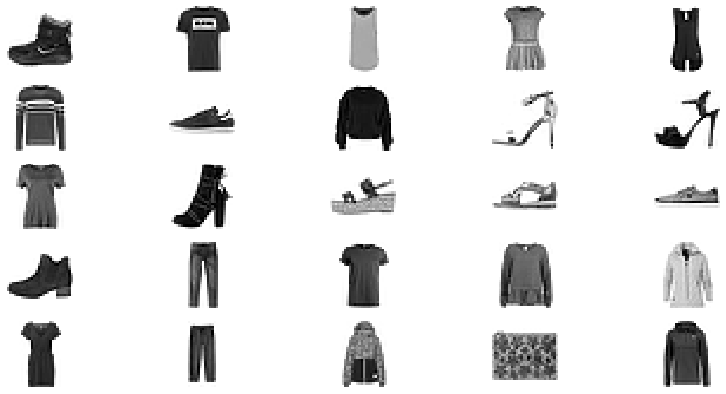

In [109]:
# Compute and show a sample of input images along each of the two main axes as images (as in the lecture)

plot_as_in_lecture(plt.figure(1,figsize=(14,7)), X)
plt.show()

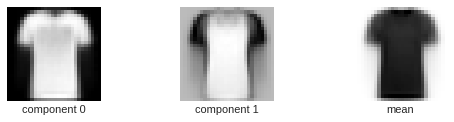

In [110]:
# Apply your code to the class 0 (T-shirt/top) of Fashion MNIST. Answer the following questions:

from sklearn.decomposition import PCA
pca_0 = PCA(n_components=2)
X_pca_0 = pca_0.fit_transform(X[y==0])

plot_comp_mean(pca_0)

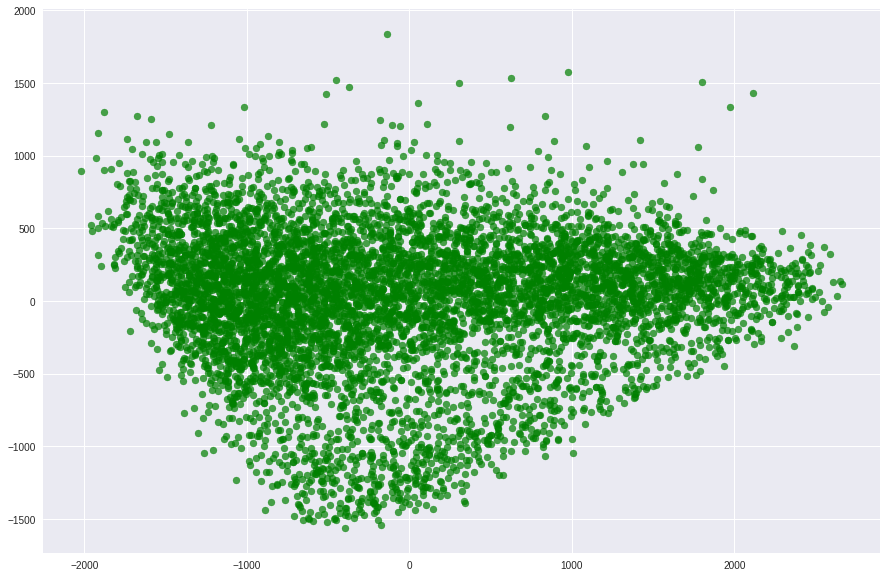

In [111]:
fig = plt.figure(1, figsize=(15,10));
plt.scatter(X_pca_0[:,0],X_pca_0[:,1], marker='o',c='green', alpha=0.7);
plt.show;

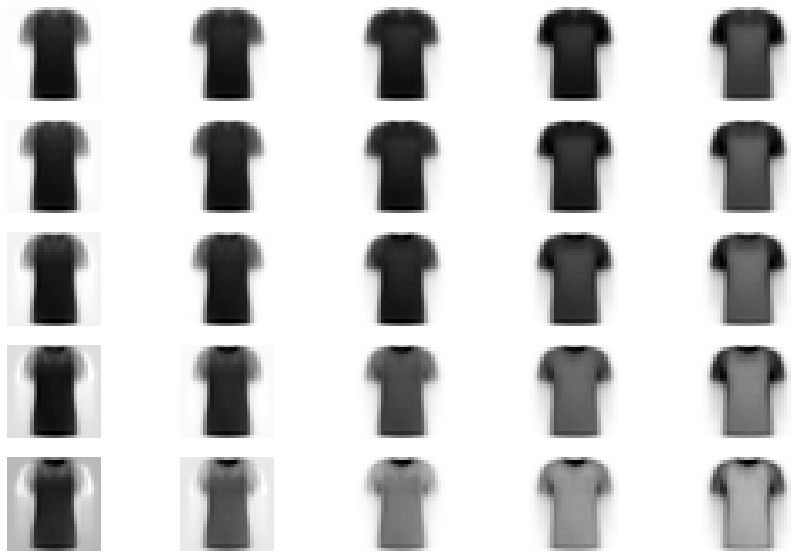

In [112]:
X_0_new = compute_new_data(X_pca_0, pca_0)

plot_as_in_lecture(plt.figure(1, figsize=(15,10)), X_0_new)
plt.show()

#### Analysis:

What aspect(s) of the data does the first component capture?

The first component of the image represents the slanting. We can observe that the inside or shape of the shirt is well presented by the white color.

What aspect(s) of the data does the second component capture?

The second component captures the lengthening of lower tail. We see that especially the out lines of the shirt are shown through dark color.

### b) Analyze two classes together and separately (2 points)

Apply the same analysis as in a) to the following subsets of data points:

- images in the union of class 2 and 4 (Pullover and Coat). In the scatter plot, indicate the two classes by color. 
- images in class 2 (Pullover). 
- images in class 4 (Coat). 

Compare the three analyses.  

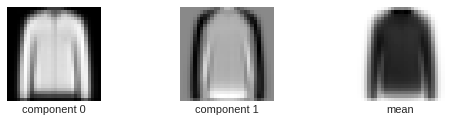

In [113]:
# images in the union of class 2 and 4 (Pullover and Coat). In the scatter plot, indicate the two classes by color.
from sklearn.decomposition import PCA
pca_2_4 = PCA(n_components=2)
X_2 = X[y==2]
X_4 = X[y==4]
X_2_4 = np.concatenate((X_2, X_4), axis=0)
X_pca_2_4 = pca_2_4.fit_transform(X_2_4)

plot_comp_mean(pca_2_4)

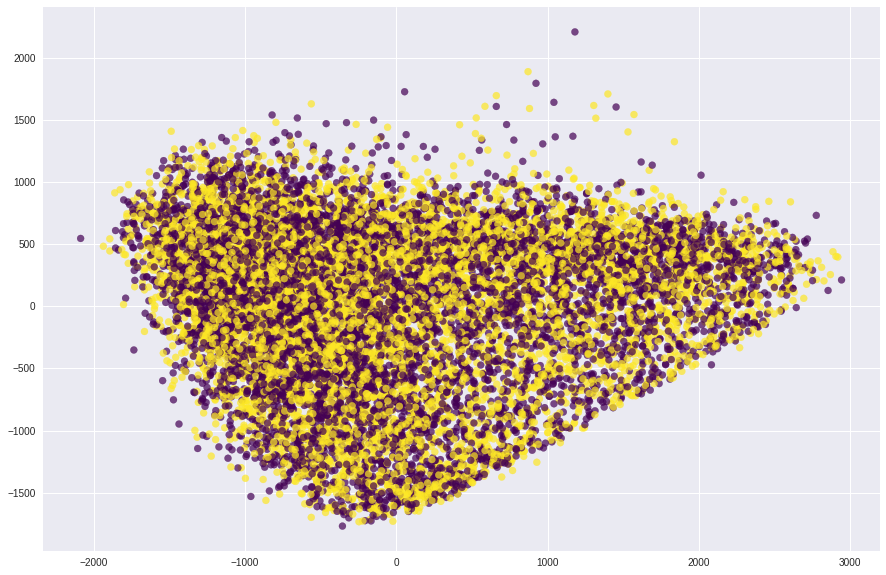

In [114]:
# I was not sure how to mark the color properly because I could not select classes 2and4 from y and link to the data generated by pca. Thus, only one color coding. It is already hear apparent that classes are indeed very alike.
# I tried merging classes above for pca different with union1d or concatenate but both didnt allow me to represent a color coding

y[(np.where((y == 2) | (y == 4)))]


fig = plt.figure(1, figsize=(15,10));
plt.scatter(X_pca_2_4[:,0], X_pca_2_4[:,1], marker='o',c=y[(np.where((y == 2) | (y == 4)))], alpha=0.7);
plt.show;

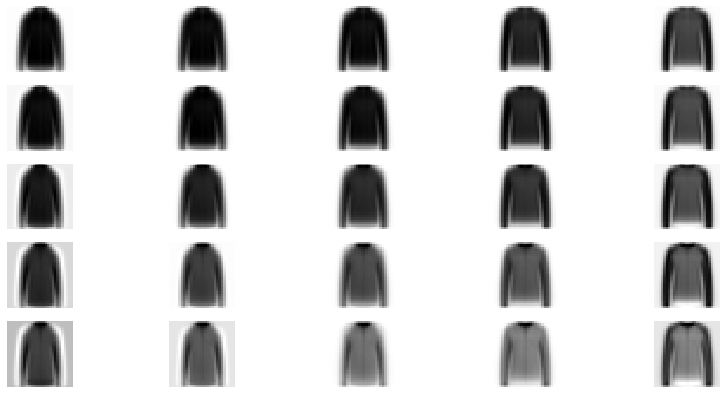

In [115]:
X_new = compute_new_data(X_pca_2_4, pca_2_4)
plot_as_in_lecture(plt.figure(1,figsize=(14,7)), X_new)
plt.show()

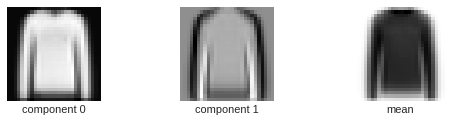

In [116]:
# images in class 2 (Pullover).

from sklearn.decomposition import PCA

pca_2 = PCA(n_components=2)
X_2 = X[y==2]
X_pca_2 = pca_2.fit_transform(X_2)

plot_comp_mean(pca_2)

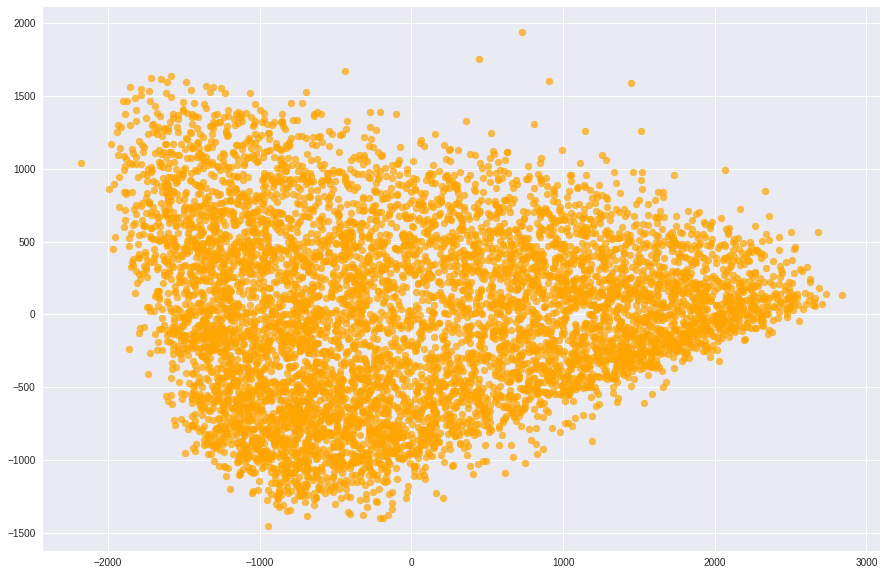

In [117]:
fig = plt.figure(1, figsize=(15,10));
plt.scatter(X_pca_2[:,0], X_pca_2[:,1], marker='o',c='orange', alpha=0.7);
plt.show;

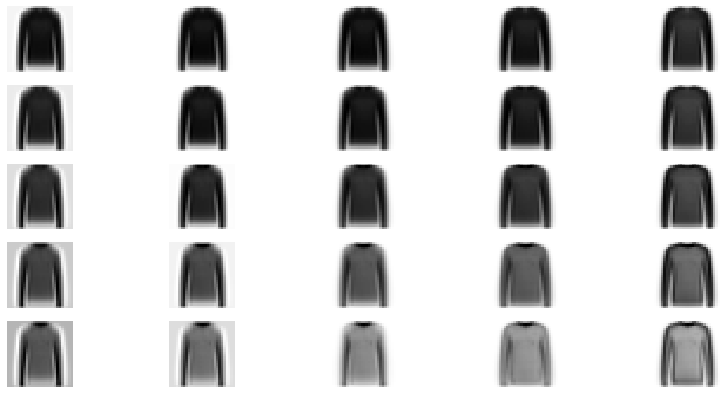

In [118]:
X_new = compute_new_data(X_pca_2, pca_2)
plot_as_in_lecture(plt.figure(1,figsize=(14,7)), X_new)
plt.show()

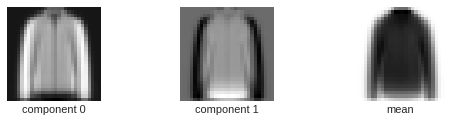

In [119]:
# images in class 4 (Coat).

from sklearn.decomposition import PCA

pca_4 = PCA(n_components=2)
X_4 = X[y==4]
X_pca_4 = pca_4.fit_transform(X_4)

plot_comp_mean(pca_4)

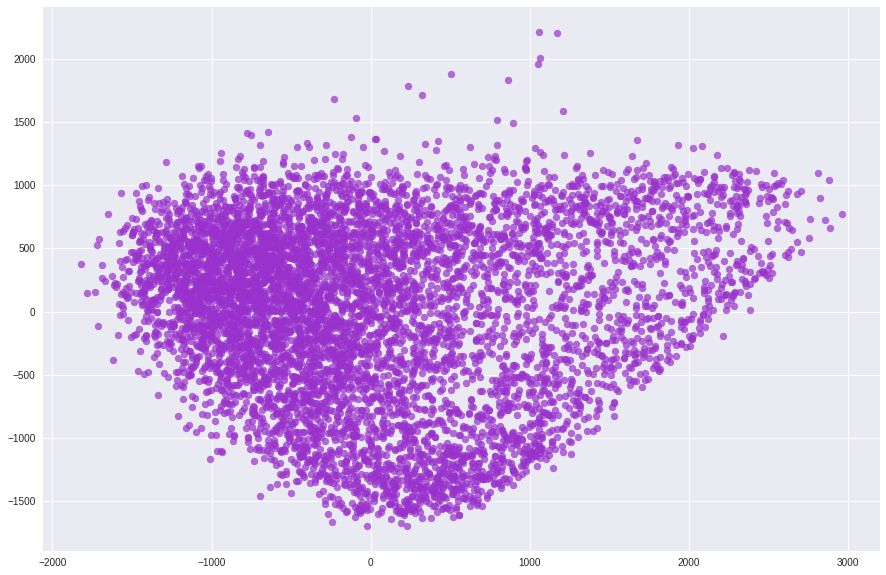

In [120]:
fig = plt.figure(1, figsize=(15,10));
plt.scatter(X_pca_4[:,0], X_pca_4[:,1], marker='o',c='darkorchid', alpha=0.7);
plt.show;

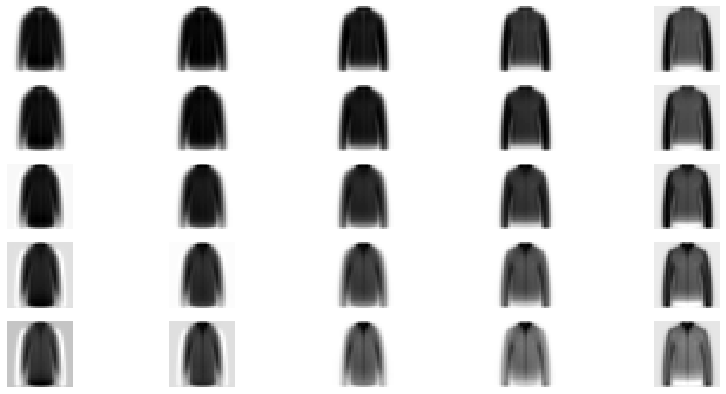

In [121]:
X_new = compute_new_data(X_pca_4, pca_4)
plot_as_in_lecture(plt.figure(1,figsize=(14,7)), X_new)
plt.show()

#### Analysis:
We see that classes 2 and 4 share a very high similarity. The data points in the scatter plot form a nearly identical shape. Further, if we compare the plotted images of both components and mean we again can see strong similarity. The mean may even look identical. Component 1 and 2 seem also very alike besides that class 4 has small difference. The difference is seen in the zipper that is present in both component 1 and 2.



### c) Analyze a cluster computed by k-means (2 Points)

Run k-means on Fashion MNIST with k=10 using k-means++ and random_state=0. 

Compute and show a confusion matrix of the clusters with respect to the original labels. 

Choose a cluster where more than one class is predominant.
Apply the same analysis as in a) to the components of the chosen cluster. In the scatter plot, indicate the original class labels with color.

In [0]:
# Run k-means on Fashion MNIST with k=10 using k-means++ and random_state=0.

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0)
y_pred = kmeans.fit_predict(X)

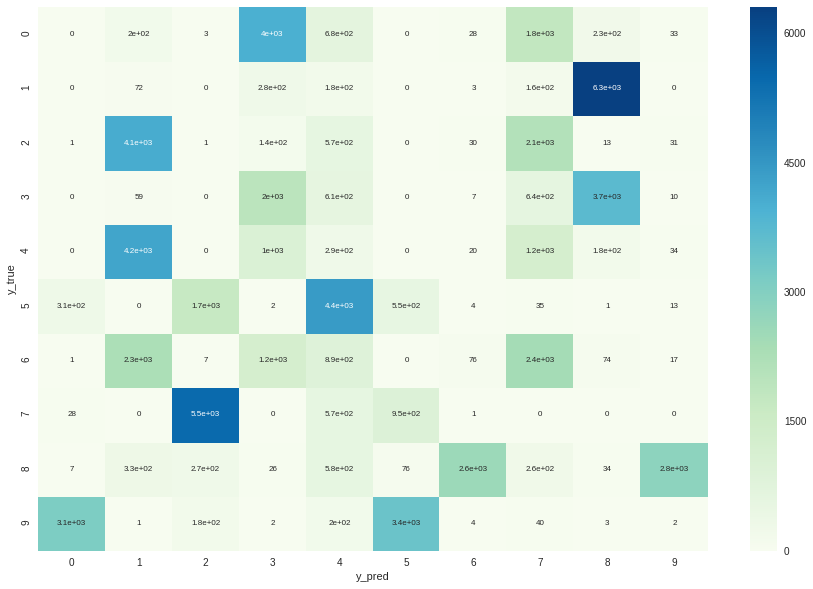

In [123]:
# Compute and show a confusion matrix of the clusters with respect to the original labels.
import seaborn as sns

df = pd.DataFrame({'y_true': y, 'y_pred': y_pred})
ct = pd.crosstab(df['y_true'], df['y_pred'])

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(ct, annot=True, ax=ax, cmap='GnBu')

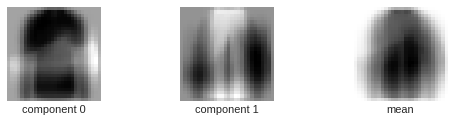

In [129]:
# Choose a cluster where more than one class is predominant. Apply the same analysis as in a) to the components of the chosen cluster. In the scatter plot, indicate the original class labels with color.

from sklearn.decomposition import PCA
pca_7 = PCA(n_components=2)
X_pca_7 = pca_7.fit_transform(X[y==y])

plot_comp_mean(pca_7)

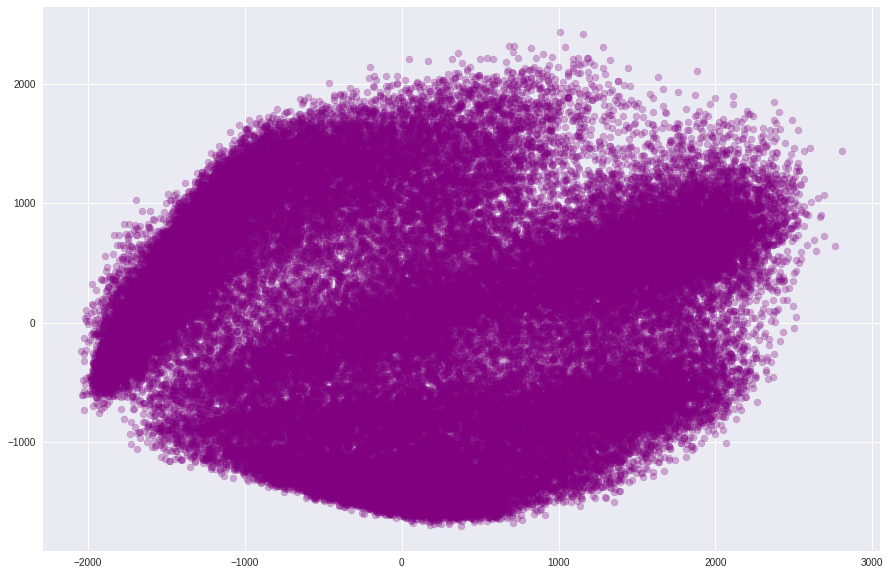

In [128]:
fig = plt.figure(1, figsize=(15,10));
plt.scatter(X_pca_7[:,0], X_pca_7[:,1], marker='o', c='purple', alpha=0.7);
plt.show;

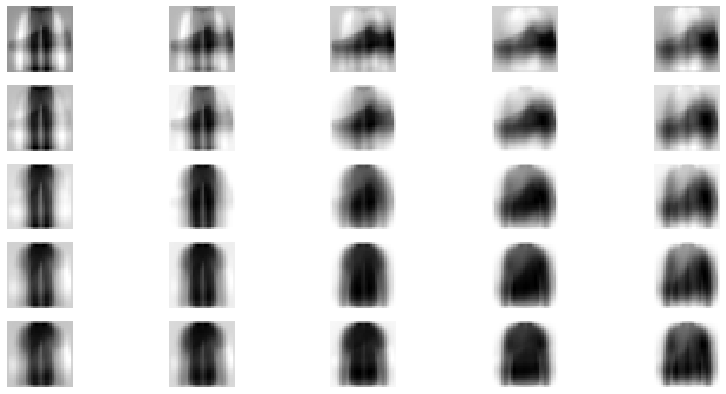

In [126]:
X_new = compute_new_data(X_pca_7, pca_7)
plot_as_in_lecture(plt.figure(1,figsize=(14,7)), X_new)
plt.show()

#### Analysis:
Class Shirt was chosen as there are many overlapping cluster which makes sense when studying samples of the data set.
There is overlap in classes 2, 4, and 1 (in heatmap) which is indeed also observable in the images of the data as theses pieces of clothing have similar shape (shirts, coats, pullover, etc.)

